In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.

In [13]:
path = "/home/andres/Desktop/Trabajo Practico/train.csv"
df = pd.read_csv(path, index_col='id', parse_dates=['fecha'])

In [14]:
"UNIFICO ALGUNOS VALORES"
df.loc[df['tipodepropiedad'] == 'Casa uso de suelo', 'tipodepropiedad'] = 'Casa'
df.loc[df['tipodepropiedad'] == 'Departamento Compartido', 'tipodepropiedad'] = 'Departamento'
df.loc[df['tipodepropiedad'] == 'Apartamento', 'tipodepropiedad'] = 'Departamento'
df.loc[df['tipodepropiedad'] == 'Local Comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Bodega comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Terreno comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Oficina Comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Local en centro comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Nave industrial', 'tipodepropiedad'] = 'Terreno industrial'
df['tipodepropiedad'].value_counts()

Casa                             142425
Departamento                      57482
Casa en condominio                19297
Terreno                            9945
Oficina comercial                  7693
Edificio                           1396
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Otros                               134
Terreno industrial                  107
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

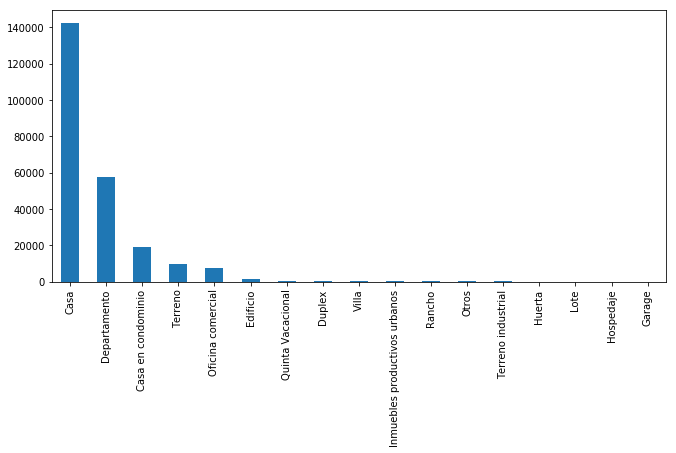

In [15]:
df['tipodepropiedad'].value_counts().plot(kind='bar',figsize=(11,5))

In [17]:
df2 = df.copy()
df2.head()

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Departamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,80.00,80.00,23533.00,nan,nan,2015-08-23,0.00,0.00,0.00,0.00,0.00,2273000.00
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,268.00,180.00,24514.00,19.31,-99.23,2013-06-28,0.00,0.00,0.00,1.00,1.00,3600000.00
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,144.00,166.00,48551.00,nan,nan,2015-10-17,0.00,0.00,0.00,0.00,0.00,1200000.00
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,63.00,67.00,53666.00,19.30,-99.69,2012-03-09,0.00,0.00,0.00,1.00,1.00,650000.00
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Departamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,95.00,95.00,47835.00,nan,nan,2016-06-07,0.00,0.00,0.00,0.00,0.00,1150000.00


In [30]:
df2['aux'] = 1
group = df2.groupby(['provincia','tipodepropiedad'])['aux'].count()
group.head(15)

provincia              tipodepropiedad              
Aguascalientes         Casa                             1346
                       Casa en condominio                197
                       Departamento                       47
                       Edificio                            6
                       Inmuebles productivos urbanos       3
                       Oficina comercial                  55
                       Quinta Vacacional                   7
                       Terreno                            86
                       Terreno industrial                  1
                       Villa                               5
Baja California Norte  Casa                             2771
                       Casa en condominio                166
                       Departamento                      201
                       Duplex                             23
                       Oficina comercial                  27
Name: aux, dtype: int64

In [41]:
group2 = group.reset_index()
group2.head()

,provincia,tipodepropiedad,aux
0,Aguascalientes,Casa,1346
1,Aguascalientes,Casa en condominio,197
2,Aguascalientes,Departamento,47
3,Aguascalientes,Edificio,6
4,Aguascalientes,Inmuebles productivos urbanos,3


In [42]:
group3 = group2.loc[group2.groupby('provincia')['aux'].idxmax()]

In [43]:
group3.head()

,provincia,tipodepropiedad,aux
0,Aguascalientes,Casa,1346
10,Baja California Norte,Casa,2771
20,Baja California Sur,Casa,1478
31,Campeche,Casa,211
40,Chiapas,Casa,907


In [44]:
import geopandas as gpd
geoframe = gpd.read_file("/home/andres/Desktop/mexEstados")

In [46]:
merge = geoframe.merge(group3,left_on='ESTADO',right_on='provincia')
merge.head()

,CODIGO,ESTADO,geometry,provincia,tipodepropiedad,aux
0,MX03,Baja California Sur,(POLYGON ((-111.2061233520508 25.8027763366699...,Baja California Sur,Casa,1478
1,MX18,Nayarit,(POLYGON ((-106.6210784912109 21.5653114318847...,Nayarit,Casa,981
2,MX14,Jalisco,"POLYGON ((-101.52490234375 21.85663986206055, ...",Jalisco,Casa,14255
3,MX01,Aguascalientes,POLYGON ((-101.8461990356445 22.01176071166992...,Aguascalientes,Casa,1346
4,MX11,Guanajuato,POLYGON ((-100.2802963256836 20.20450973510742...,Guanajuato,Casa,2326


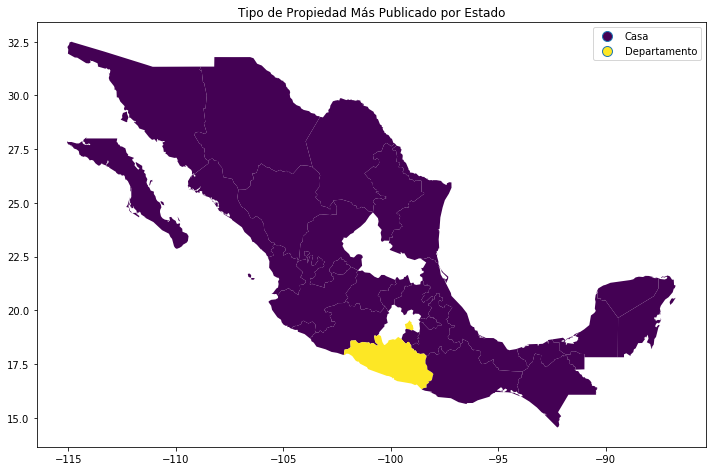

In [50]:
geoplot = merge.plot(figsize=(12,12),column='tipodepropiedad',legend=True,cmap='viridis').set_title('Tipo de Propiedad Más Publicado por Estado')